# **PRÁCTICA 2: AUTOENCODERS - Parte 1: Densos**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

## **Ejercicios EXTRA: Compara los resultados de una capa con un PCA entrenado con sklearn**

<p align="justify"> El análisis de componentes principales es un uso clásico de la técnica de aprendizaje automático para la reducción de dimensiones. Ahora tratamos de hacer lo mismo usando PCA.</p>

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

# DATOS
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [3]:
pca = PCA(32)
pca.fit(x_train)
train= pca.transform(x_train)
test = pca.transform(x_test)
approximation = pca.inverse_transform(test)

<p align="justify">Visualizando resultado:</p>

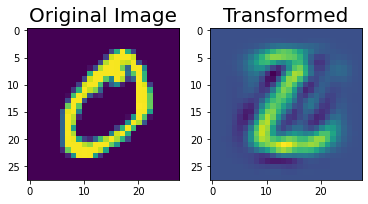

In [4]:
#plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(x_train[1].reshape(28,28))
#plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28))
#plt.xlabel('154 components', fontsize = 14)
plt.title('Transformed', fontsize = 20);

<p align="justify"> Usamos la misma dimensión aquí para comprimir y luego descomprimirlo nuevamente y trazarlo, es claramente visible que el resultado de Autoencoder es mucho mejor.</p>

<p align="justify"> Luego hicimos lo mismo, pero aquí usamos el componente principal 200 para reducir la dimensión y trazamos el resultado.</p>

In [5]:
pca = PCA(200)
pca.fit(x_train)
train= pca.transform(x_train)
test = pca.transform(x_test)
approximation_train = pca.inverse_transform(train)
approximation_test = pca.inverse_transform(test)

**Visualizando resultado:**
<p align="justify"> Esto es lo que obtenemos. La fila superior son los dígitos originales y la fila inferior son los dígitos reconstruidos. Estamos perdiendo un poco de detalle con este enfoque básico.</p>

Test data as input:


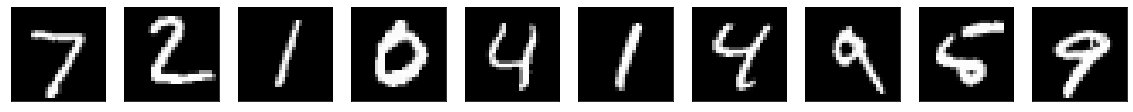

Decoded Image PCA:


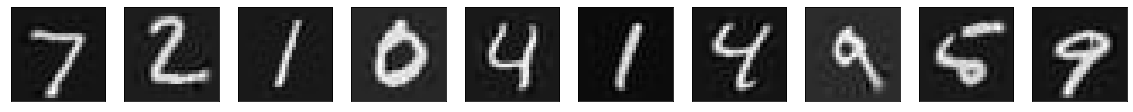

In [7]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
print("Test data as input:")
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Decoded Image PCA:")
for i in range(n):

    # display reconstruccion
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(approximation_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Resultado**

<p align="justify">Como podemos observar tanto el autoencoder de una capa como la PCA han hecho la transformación correctamente. Vemos que son más claros los números en el autoecoder de una capa que en los de la PCA. Pero la recostrucción ha sido prácticamente la misma.</p>

<p align="justify">Debemos tener en cuenta que la PCA y los autoencoder trabajan de maneras diferentes. La PCA es una transformación lineal en la que un conjunto dado de datos se aproxima mediante una línea recta. Mientra que  Autoencoder puede aprender la estructura de no linealidad que está presente en los datos.</p>

<p align="justify">Igualmente si no imponemos ninguna no linealidad en la red, Autoencoder y PCA son casi similares.</p>
